In [1]:
 ### import the references needed ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mn
%matplotlib inline

In [3]:
### read data from csv file ###
data = pd.read_csv("titanic.csv", sep=',',index_col=0)

In [4]:
### analyse data ###
# step 1: obtain a glimpse of data

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
type(data).__name__

'DataFrame'

In [9]:
# this attribute gives you structure of data like (rows, cols)
data.shape

(891, 11)

In [10]:
# this method gives complete structural info about our DataFrame object
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
# this method gives complte statistical info about our DataFrame object 
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# step 2: visualization of data

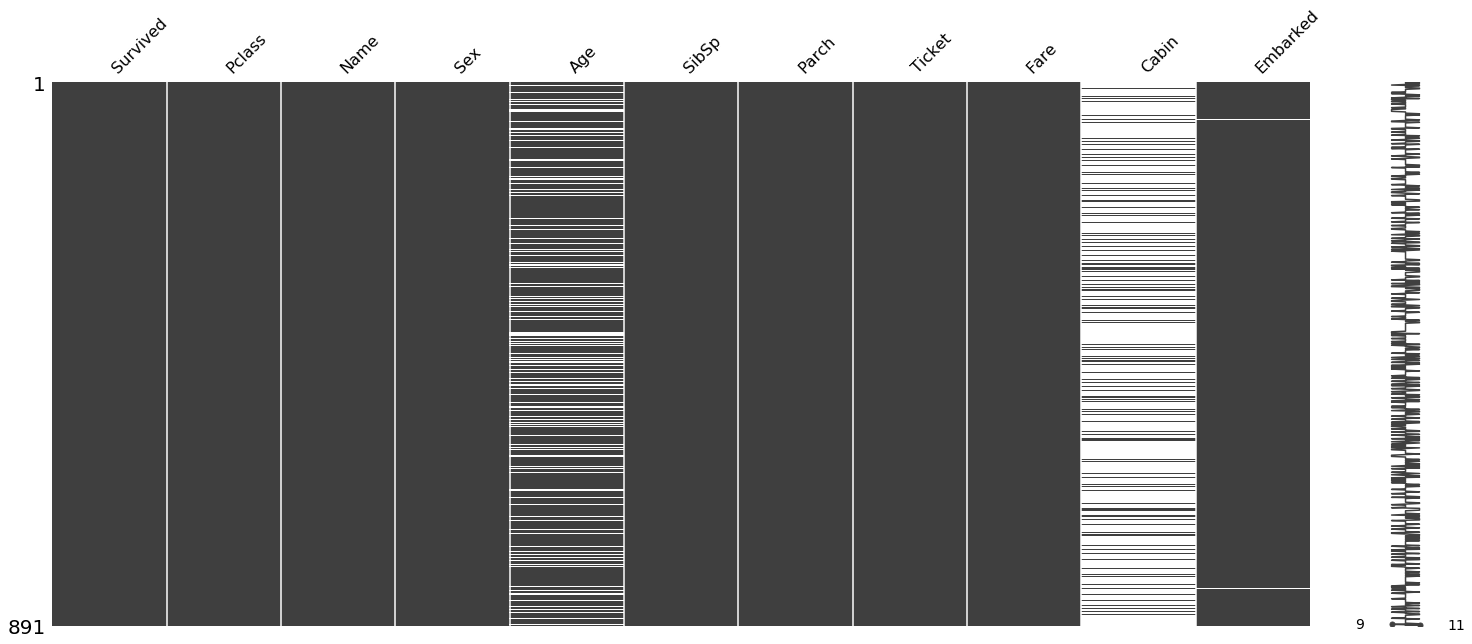

In [13]:
# using matrix method of missingo
mn.matrix(data)

In [14]:
# using above method we found that there are gaps(unfilled values)
# in some cells,
# while cleaning data to draw inference we may need those fields or may not
# fields not needed are not in consideration
# but fields that are needed to be filled by some predicted values
# to predict values, use different plots to study data

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


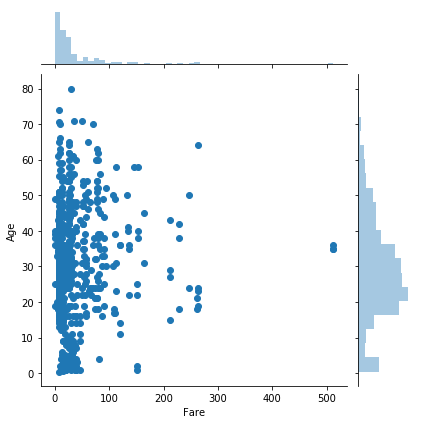

In [15]:
sb.jointplot(x='Fare', y='Age', data=data)

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


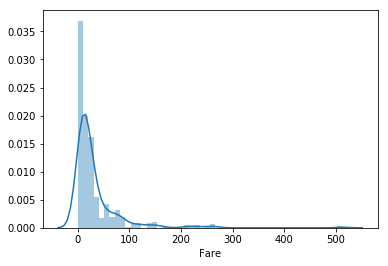

In [16]:
sb.distplot(data['Fare'])

In [17]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5,1,'data.corr()')

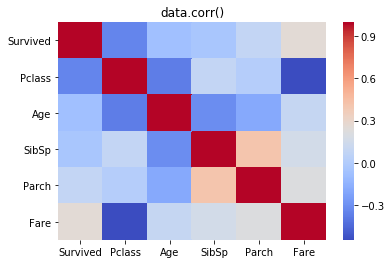

In [18]:
sb.heatmap(data.corr(),cmap='coolwarm',xticklabels=True)
plt.title('data.corr()')

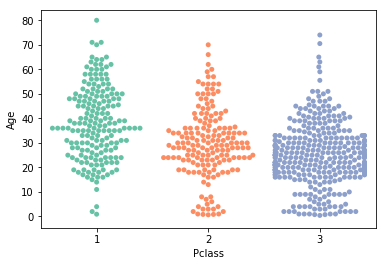

In [19]:
sb.swarmplot(x='Pclass',y='Age',data=data,palette='Set2')

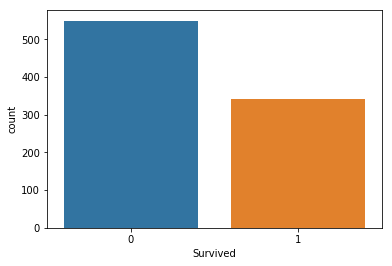

In [20]:
sb.countplot(x='Survived',data=data)

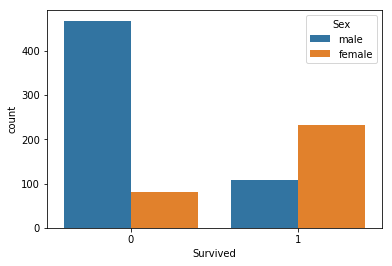

In [21]:
sb.countplot(x='Survived',hue='Sex',data=data)

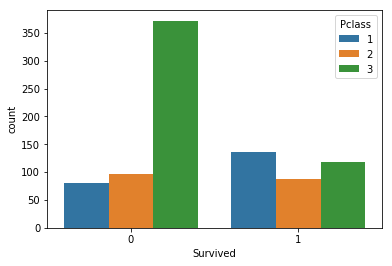

In [22]:
sb.countplot(x='Survived',hue='Pclass',data = data)

In [23]:
### cleaning of data ###

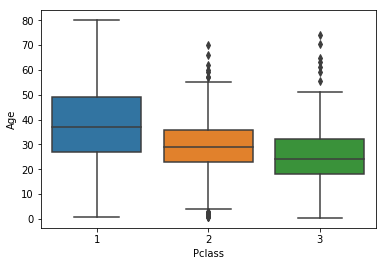

In [24]:
sb.boxplot(x='Pclass',y='Age',data=data)

In [25]:
#The average age for each of the classes are estimated to be as follows:
  
#  For **Class 1**  The median age is 37
#  For **Class 2**  The median age is 29
#  For **Class 3**  The median age is 26
  
# Let's impute these values into the age column.


In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class 1
        if Pclass == 1:
            return 37
        # Class 2 
        elif Pclass == 2:
            return 29
        # Class 3
        return 26
    return Age


In [27]:
# apply the function to data set
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

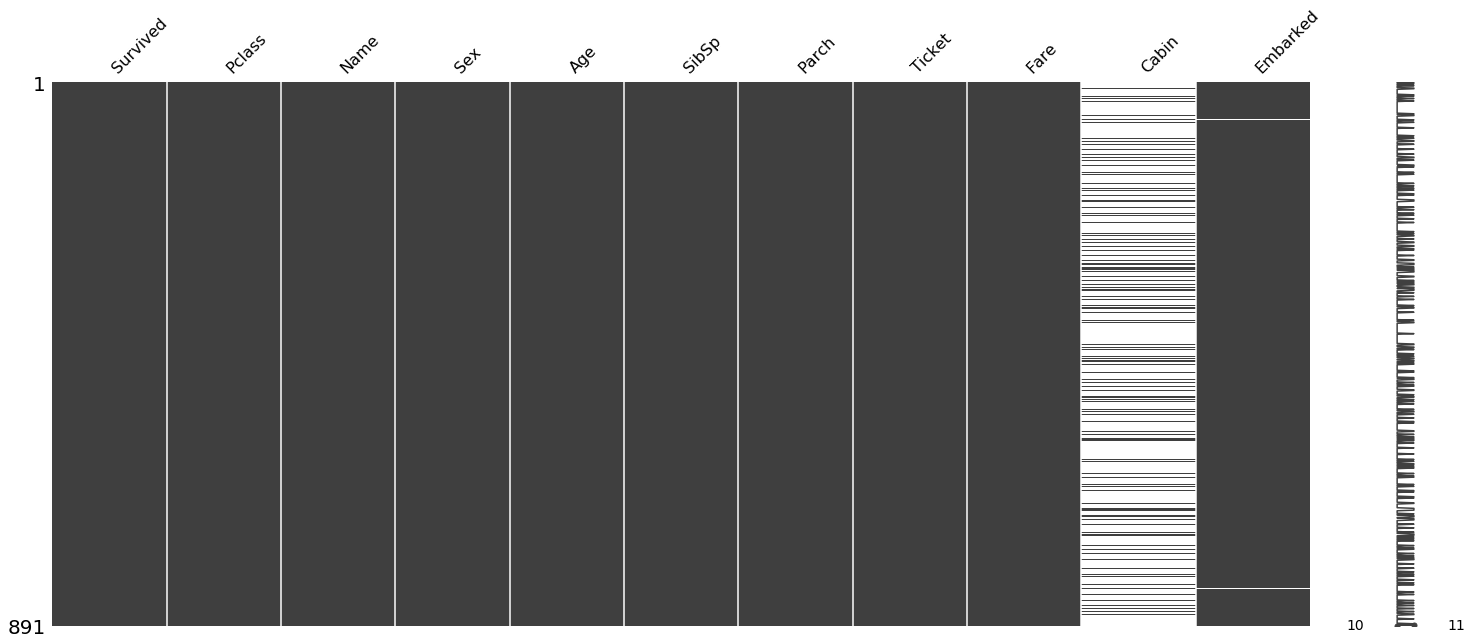

In [28]:
# now visualize the data using matrix() of missingno
mn.matrix(data)

In [29]:
# the Age column is imputed successfully
# next column with null values is cabin
# cabin doesn't play any role in my way of predicting survival
# therefore I'm droping cabin column
# I'm removing null rows of embarked assuming that they've survived

In [30]:
data.drop('Cabin', axis = 1,inplace=True)

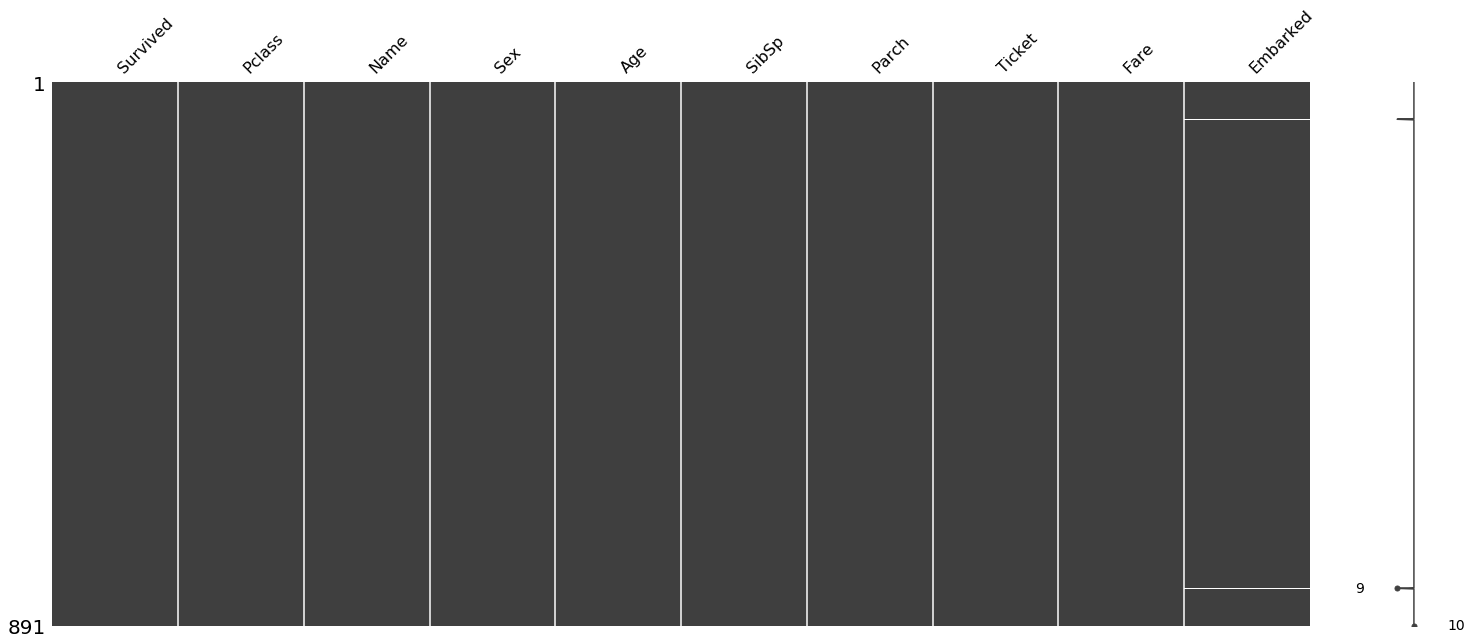

In [31]:
mn.matrix(data)

In [32]:
# cabin is dropped
# now rows of embarked
data.dropna(inplace = True)

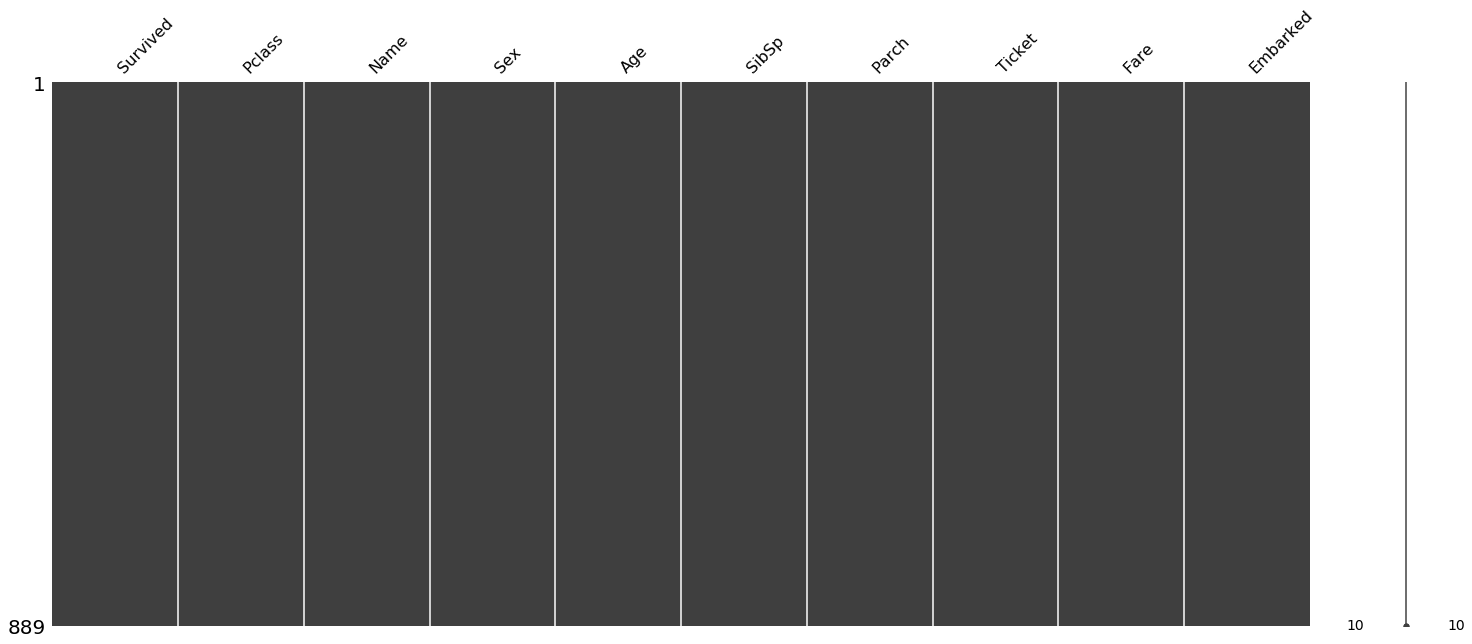

In [33]:
mn.matrix(data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [35]:
### Categorical value conversion ###

In [36]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [38]:
sex_df = pd.get_dummies(data['Sex'],drop_first=True)
sex_df.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [39]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
embark_df = pd.get_dummies(data['Embarked'],drop_first=True)
embark_df.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [42]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [43]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [44]:
data = pd.concat([data,sex_df,embark_df],axis=1)

In [45]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
### selecting model for testing ###

In [47]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [48]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
# predicting model on test set
predicted =  logmodel.predict(X_test)

In [50]:
# Evaluate the predictions
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
# 1 Confusion Matrix

#True positive   |	False positive,  
#________________|________________  
#                |                  
#False negative  |	True negative    `

In [52]:
print(confusion_matrix(predicted,y_test))

[[148  36]
 [ 15  68]]


In [53]:
## Recall score

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The best value is 1 and the worst value is 0.


In [54]:
from sklearn.metrics import recall_score

print(recall_score(y_test,predicted))

0.6538461538461539


In [55]:
## f1_score

# The F1 score can be interpreted as a weighted average of the precision and recall,
# where an F1 score reaches its best value at 1 and worst score at 0.
# The relative contribution of precision and recall to the F1 score are equal.
# The formula for the F1 score is:
#                F1 = 2 \* (precision \* recall) / (precision + recall)

In [56]:
from sklearn.metrics import f1_score

print(f1_score(y_test,predicted))

0.7272727272727274


In [57]:
# To get all the above metrics at one go, use the following function:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

